# CSC221 Group Project - Nathaniel Behymer

In [3]:
import csv
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = "https://www.imdb.com/chart/toptv/?ref_=nv_tvv_250"
page = urllib.request.urlopen(url)

from bs4 import BeautifulSoup
soup = BeautifulSoup(page, "lxml")

## Code (Scrapes IMDb's Top 250 Rated TV Shows)

In [4]:
sortable_table = soup.find_all('tbody', class_='lister-list')

In [5]:
# Creating lists for collumns
rank = []
title = []
rating = []

r = 1
for row in sortable_table[0].findAll('tr'):
    # Iterates on rank through addition, as the page is already in order
    rank.append(r)
    # Scrapes for the title of the show
    title.append(row.find_all('td')[1].find('a').next_element)
    # Scrapes for the rating of the show
    rating.append(row.find_all('td')[2].find('strong').next_element)
    r += 1

In [6]:
# Testing with pandas
import pandas as pd
df=pd.DataFrame(rank,columns=['Rank'])
df['Title']=title
df['Rating']=rating
df

,Rank,Title,Rating
0,1,Planet Earth II,9.5
1,2,Planet Earth,9.4
2,3,Breaking Bad,9.4
3,4,Band of Brothers,9.4
4,5,Chernobyl,9.3
...,...,...,...
245,246,Vikings,8.4
246,247,Garth Marenghi's Darkplace,8.4
247,248,Avrupa Yakasi,8.4
248,249,Guardian: The Lonely and Great God,8.4


In [7]:
# Exporting to CSV
df.to_csv('CSC221_webscrape_data.csv')

# Part 2

In [153]:
from matplotlib import pyplot as plt

# Reading the csv file and its data
data = pd.read_csv('CSC221_webscrape_data.csv')

# Assigning the data to their own respected variables
rank = data['Rank']
ratings = data['Rating']
showName  = data['Title']

# These lists will contain the shows name, rank, and their review rates.
combined = []
rates = []

# This will concatenate only 50 shows name and their rank into one and will add it to the new list
for i in range(50):
    combined.append(showName[i] + " (Rank" + str(rank[i]) + ")")


# This will append 50 of the ratings into a new list
for i in range(50):
    rates.append(ratings[i])

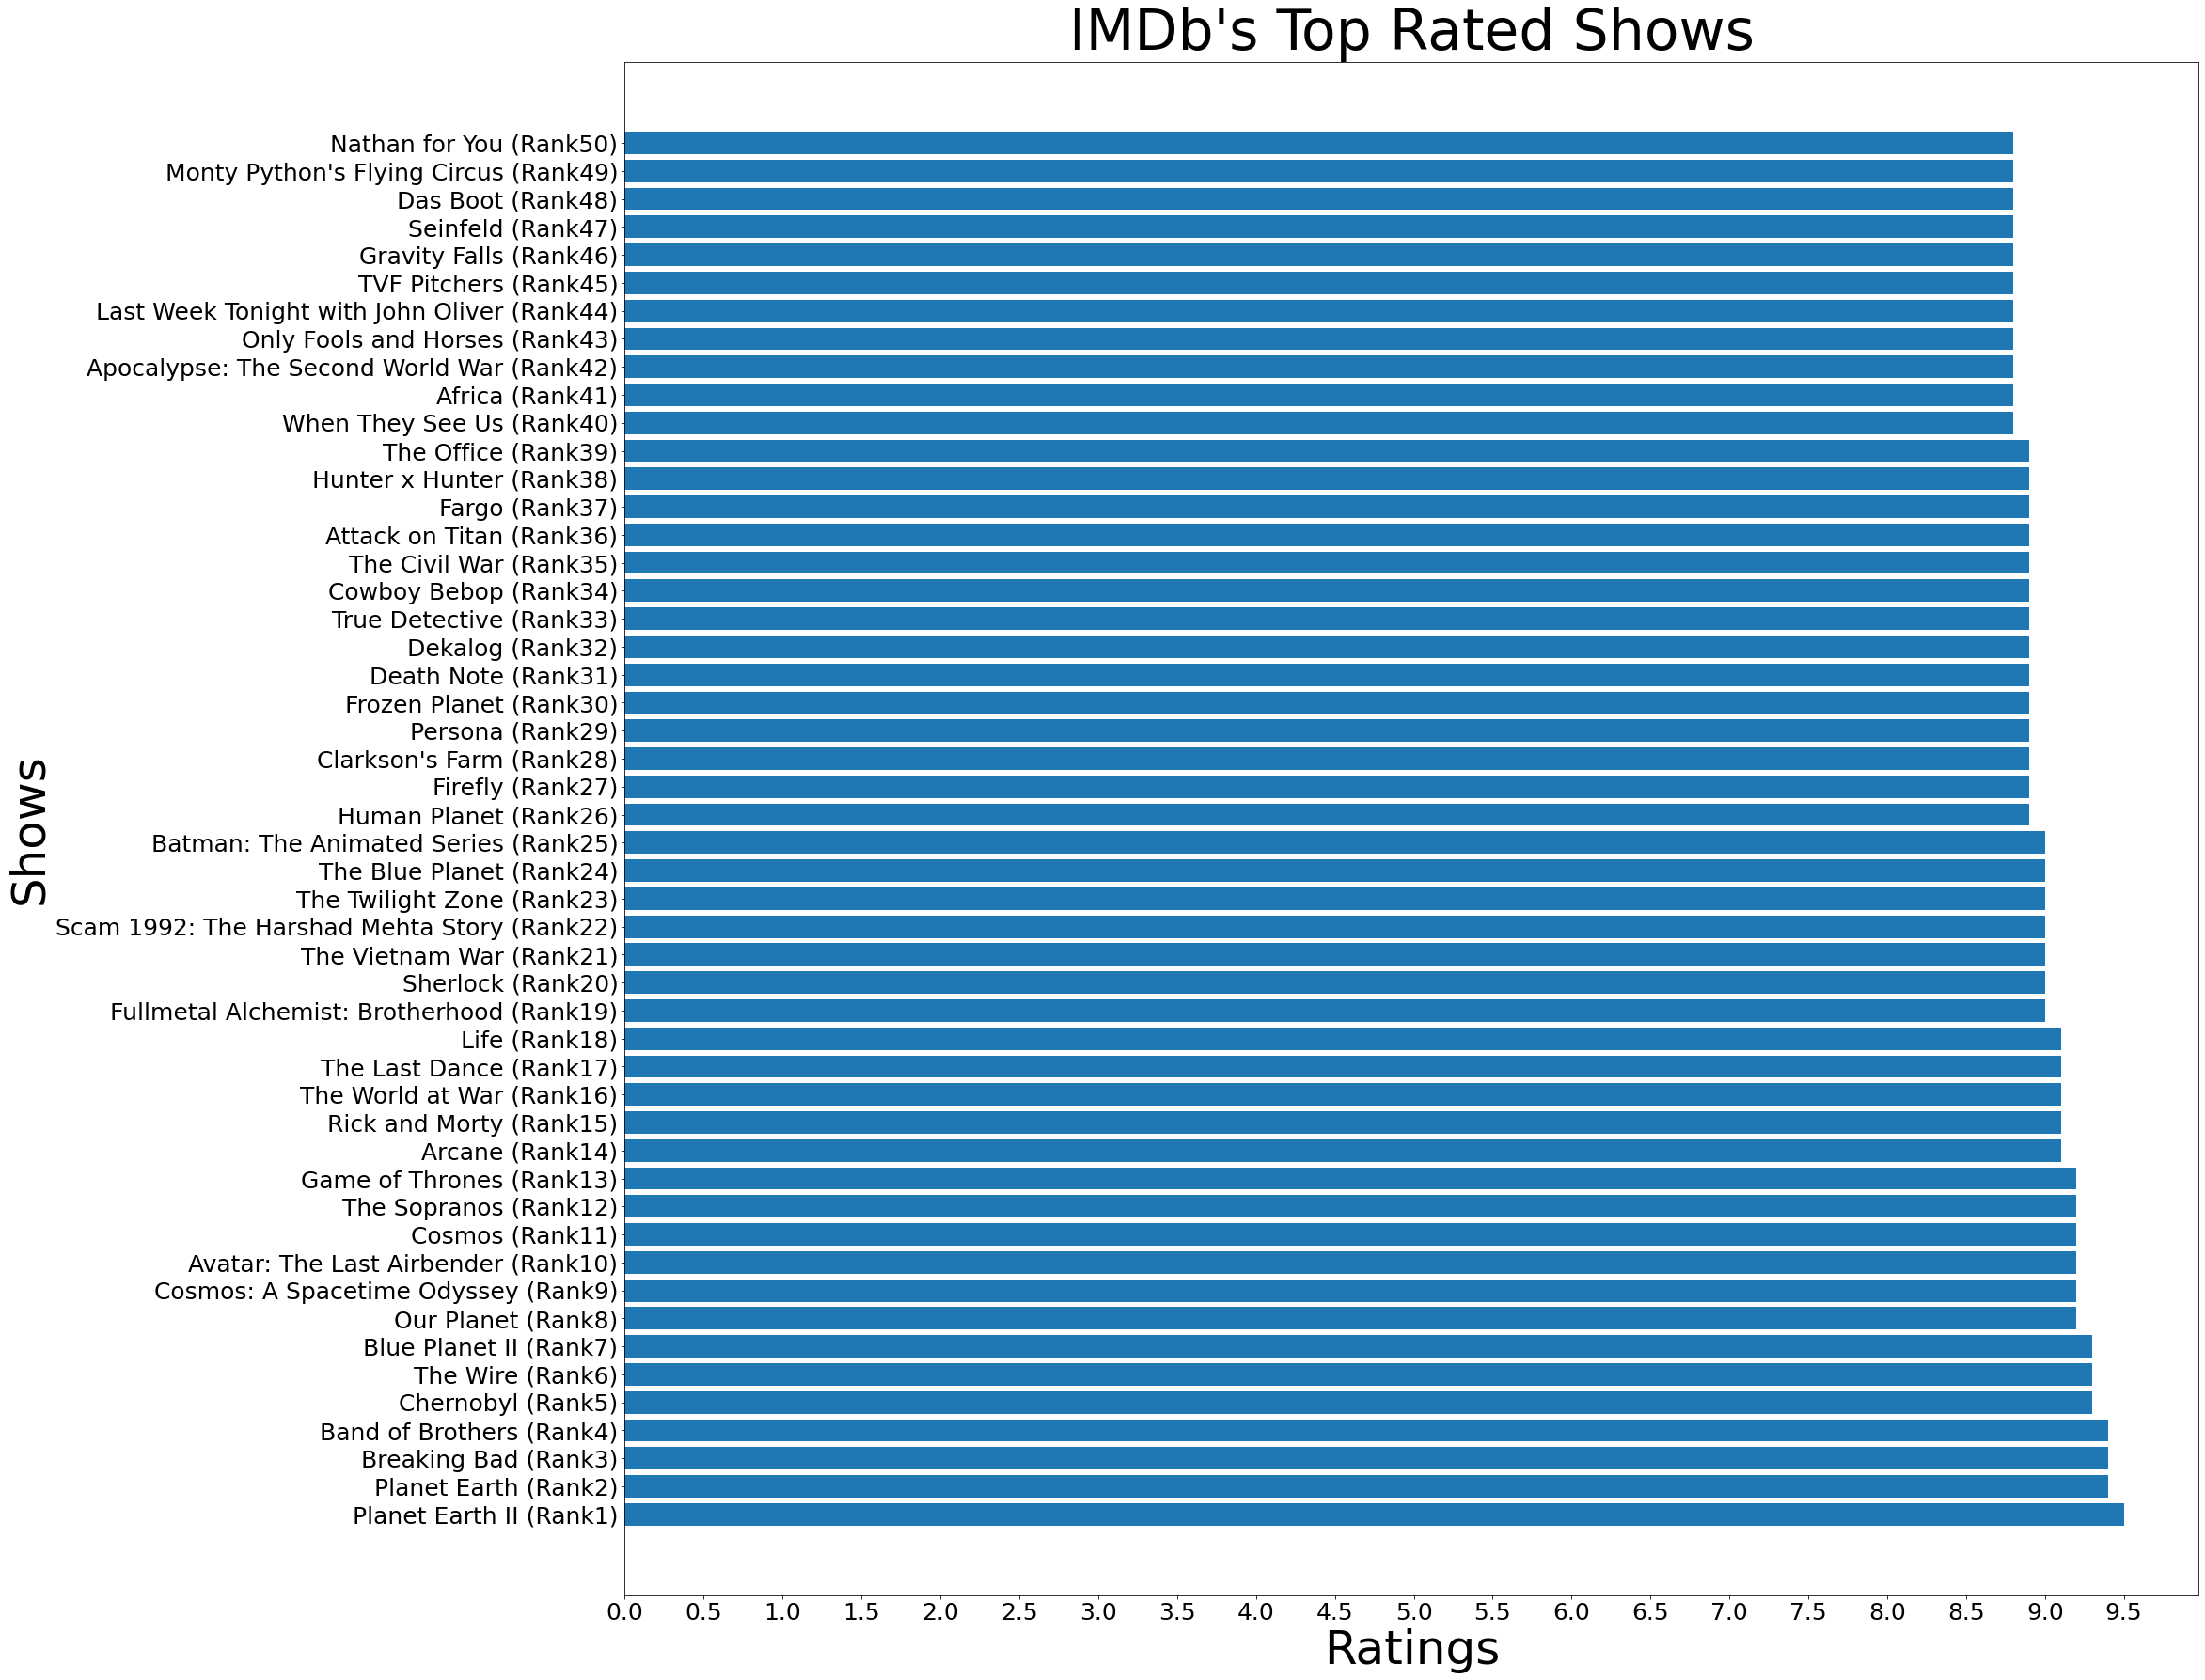

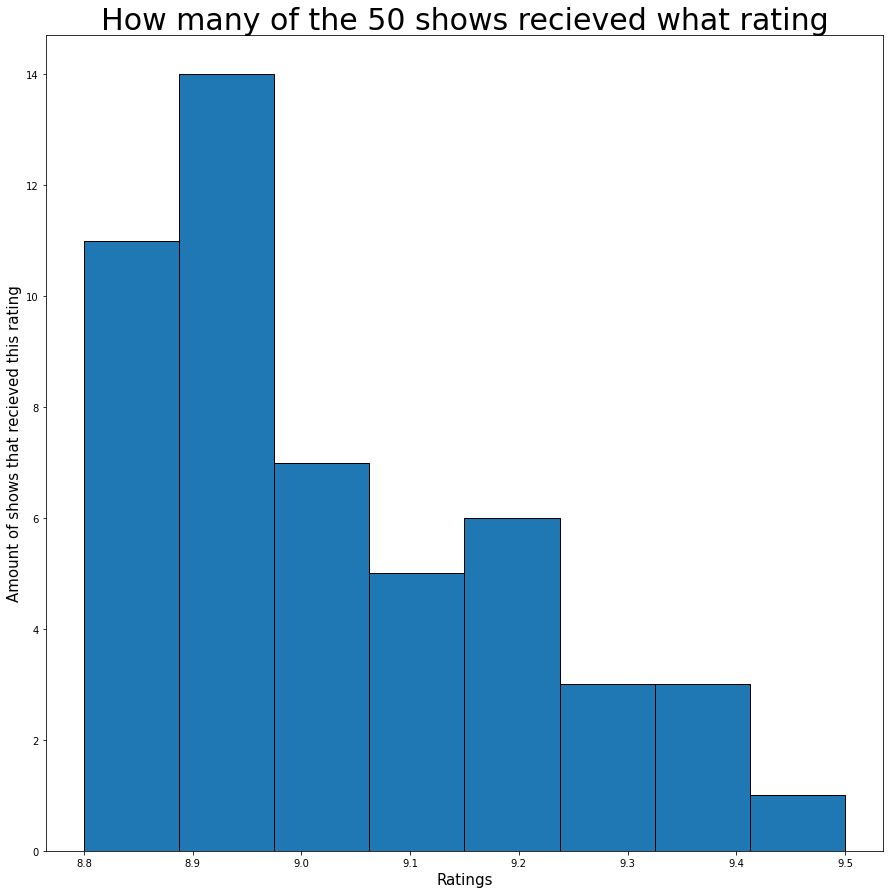

In [154]:
# This list contaians what a show can recieve as a rating
cool = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]


# This will plot the ranking of the first top 50 rated shows
plt.figure(figsize=(30,30))
plt.title("IMDb's Top Rated Shows", fontsize=60)
plt.xlabel("Ratings", fontsize = 50)
plt.ylabel("Shows", fontsize = 50)
plt.xticks(cool,fontsize = 25)
plt.yticks(fontsize = 25)
plt.barh(combined, width=rates, )

# This histogram will show how many of the top 50 shows recieved this amount of ratings
plt.figure(figsize=(15,15))
plt.title('How many of the 50 shows recieved what rating', fontsize=30)
plt.hist(rates,8, edgecolor="black")
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('Amount of shows that recieved this rating', fontsize = 15)

# This will plot all the graphs data
plt.show()